<a href="https://colab.research.google.com/github/arzucivelekoglu/keras-tensorflow-subject/blob/main/2_keras_model_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Keras Model Performance Analysis**

Kaydettiğimiz modeli yüklüyoruz

In [2]:
from tensorflow.keras.models import load_model

model = load_model("/content/mnist_simple_cnn_25_epochs.h5")

Mnist veri setini yüklüyoruz

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Veri setinde düzenlemeler yapıp test veri seti üzerinden tahmin yapıyoruz

In [4]:
import numpy as np

x_test = x_test.reshape(10000, 28, 28, 1)

pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 7s 22ms/step


In [17]:
result = np.absolute(y_test - pred)
misclassified_indices = np.nonzero(result > 0) # yanlış sınıflandırılmış_indisler


In [ ]:
misclassified_indices

In [16]:
len(misclassified_indices[0])

502

In [26]:
import cv2

def imshow(title="", image = None, size = 6):
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.show()

1/1 [==============================] - 0s 24ms/step


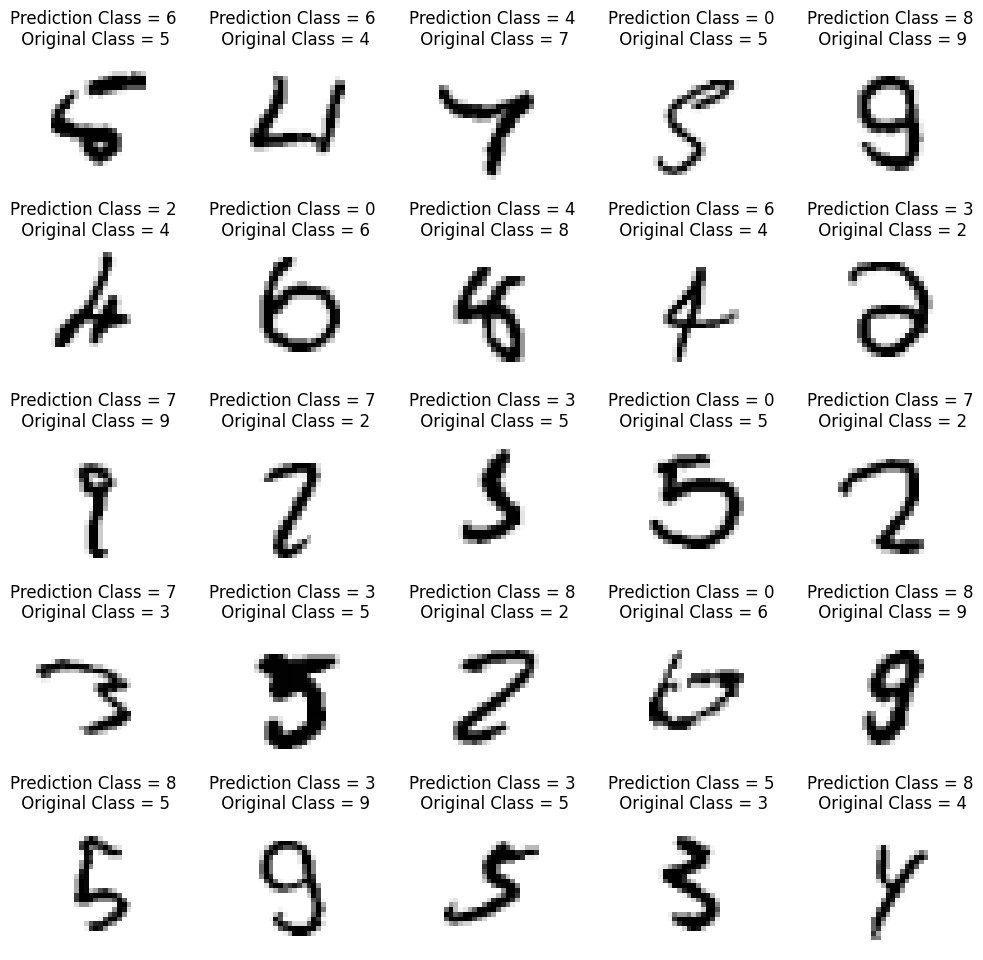

In [35]:
import matplotlib.pyplot as plt
import numpy as np

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()


for i in np.arange(0, L*W):
  input_image = x_test[misclassified_indices[0][i]]
  index = misclassified_indices[0][i]
  predict_index = str(np.argmax(model.predict(input_image.reshape(1,28,28,1)), axis=-1)[0])

  axes[i].imshow(input_image.reshape(28,28), cmap='gray_r')
  axes[i].set_title(f"Prediction Class = {predict_index}\n Original Class = {y_test[index]}")
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

Confusion Matrix Oluşturuyoruz

In [36]:
from sklearn.metrics import confusion_matrix
import numpy as np

x_test = x_test.reshape(10000,28,28,1)
y_pred = np.argmax(model.predict(x_test), axis=-1)

print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 8s 27ms/step
[[ 968    0    0    2    0    2    6    1    1    0]
 [   0 1117    2    2    0    0    4    1    9    0]
 [   8    1  964   15    7    1    9    9   16    2]
 [   3    1    7  964    0    6    1    8   11    9]
 [   1    1    6    0  929    0   10    2    4   29]
 [  13    2    1   31    1  812   14    1   10    7]
 [   9    3    2    1    7    8  924    1    3    0]
 [   2    6   20    3    4    0    0  967    4   22]
 [   6    3    1   21    5    9   10    6  905    8]
 [   9    6    1   12   18    1    1    8    5  948]]


Her sınıfın doğruluk oranlarına bakıyoruz

In [41]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 968,    0,    0,    2,    0,    2,    6,    1,    1,    0],
       [   0, 1117,    2,    2,    0,    0,    4,    1,    9,    0],
       [   8,    1,  964,   15,    7,    1,    9,    9,   16,    2],
       [   3,    1,    7,  964,    0,    6,    1,    8,   11,    9],
       [   1,    1,    6,    0,  929,    0,   10,    2,    4,   29],
       [  13,    2,    1,   31,    1,  812,   14,    1,   10,    7],
       [   9,    3,    2,    1,    7,    8,  924,    1,    3,    0],
       [   2,    6,   20,    3,    4,    0,    0,  967,    4,   22],
       [   6,    3,    1,   21,    5,    9,   10,    6,  905,    8],
       [   9,    6,    1,   12,   18,    1,    1,    8,    5,  948]])

In [44]:
 conf_mat.sum(1)# sütun bazında toplama

array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])

In [42]:
# TN ve TP alıyoruz sadece
confusion_matrix(y_test, y_pred).diagonal()


array([ 968, 1117,  964,  964,  929,  812,  924,  967,  905,  948])

In [38]:
conf_mat = confusion_matrix(y_test, y_pred)

# 100* doğru tahmin / sınıf bazında toplamı
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i,ca) in enumerate(class_accuracy):
    print(f'Accuracy for {i} : {ca:.3f}%')

Accuracy for 0 : 98.776%
Accuracy for 1 : 98.414%
Accuracy for 2 : 93.411%
Accuracy for 3 : 95.446%
Accuracy for 4 : 94.603%
Accuracy for 5 : 91.031%
Accuracy for 6 : 96.451%
Accuracy for 7 : 94.066%
Accuracy for 8 : 92.916%
Accuracy for 9 : 93.954%


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.93      0.95      1032
           3       0.92      0.95      0.94      1010
           4       0.96      0.95      0.95       982
           5       0.97      0.91      0.94       892
           6       0.94      0.96      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.93      0.93       974
           9       0.92      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



**Precision (Kesinlik) – Tahminlerinizin yüzde kaçı doğruydu?**

Kesinlik, bir sınıflandırıcının aslında negatif olan bir örneği pozitif olarak etiketlememe yeteneğidir. Her sınıf için gerçek pozitiflerin, doğru ve yanlış pozitiflerin toplamına oranı olarak tanımlanır.



```
TP – True Positives
FP – False Positives

Precision – Olumlu tahminlerin doğruluğu.
Precision = TP/(TP + FP)
```

**Recall – Pozitif vakaların yüzde kaçını yakaladınız?**

Recall  bir sınıflandırıcının tüm olumlu örnekleri bulma yeteneğidir. Her sınıf için, gerçek pozitiflerin, gerçek pozitiflerin ve yanlış negatiflerin toplamına oranı olarak tanımlanır.




```
FN – False Negatives

Recall: Doğru olarak tanımlanmış pozitiflerin oranı.
Recall = TP/(TP+FN)
```



**F1 Score - Olumlu tahminlerin yüzde kaçı doğruydu?**

F 1  skoru, kesinliğin ağırlıklı harmonik ortalamasıdır ve en iyi skor 1.0 ve en kötü 0.0 olacak şekilde hatırlamadır. Genel olarak konuşursak, F 1  puanları kesinlik ve geri çağırmayı hesaplamalarına dahil ettikleri için doğruluk ölçümlerinden daha düşüktür. Genel bir kural olarak,  sınıflandırıcı modellerini karşılaştırmak için global doğruluk yerine F 1'in ağırlıklı ortalaması kullanılmalıdır.



```
F1 Score = 2*(Recall * Precision) / (Recall + Precision)
```



